In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import cv2 as cv
import math
from PIL import Image, ImageDraw, ImageFont, ImageColor

## Import image

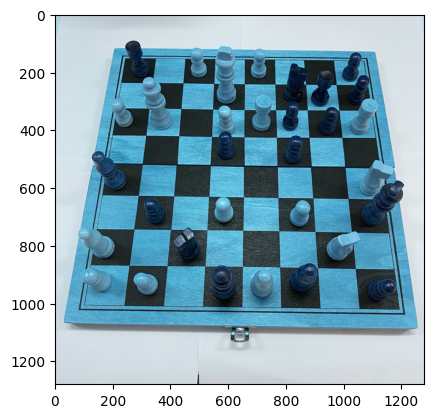

In [7]:
img_path = "/home/thierry/code/zuzannaszu/chess_hacker/Raw_Data/new_chess_data/boards/board1.jpeg"
img = cv.imread(img_path)
plt.imshow(img)

## Image processing

### Gray and filters

In [173]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel = np.ones((5, 5), np.uint8)
kernel_sharp = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

sharp = cv.filter2D(img_gray, -1, kernel_sharp)
blur = cv.medianBlur(img_gray, 5)
blur = cv.GaussianBlur(blur, (9, 9), 2)
erosion = cv.erode(img_gray, kernel, iterations=4)
dilation = cv.dilate(img_gray, kernel, iterations=3)

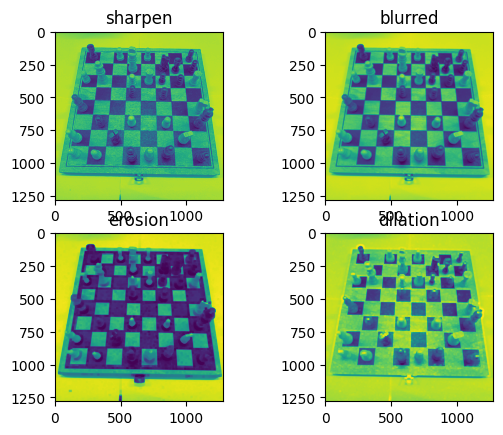

In [177]:
plt.subplot(2,2,1)
plt.imshow(sharp)
plt.title("sharpen")
plt.subplot(2,2,2)
plt.imshow(blur)
plt.title("blurred")
plt.subplot(2,2,3)
plt.imshow(erosion)
plt.title("erosion")
plt.subplot(2,2,4)
plt.imshow(dilation)
plt.title("dilation");

### Canny detector

In [178]:
v = np.median(img)
sigma = 1
#lower = int(max(0, (1.0 - sigma) * v))
#upper = int(min(255, (1.0 + sigma) * v))
lower = 50
upper = 150
edge_b = cv.Canny(blur, lower, upper)
edge_s = cv.Canny(sharp, lower, upper)
edge_e = cv.Canny(erosion, lower, upper)
edge_d = cv.Canny(dilation, lower, upper)

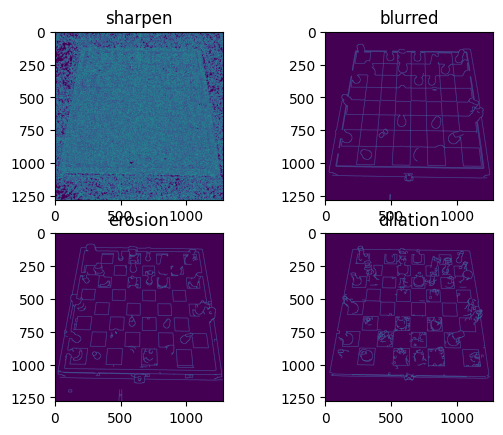

In [180]:
plt.subplot(2,2,1)
plt.imshow(edge_s)
plt.title("sharpen")
plt.subplot(2,2,2)
plt.imshow(edge_b)
plt.title("blurred")
plt.subplot(2,2,3)
plt.imshow(edge_e)
plt.title("erosion")
plt.subplot(2,2,4)
plt.imshow(edge_d)
plt.title("dilation");

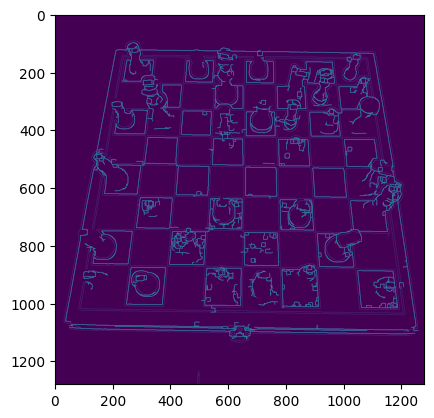

In [194]:
total = cv.addWeighted(edge_d, 1, edge_b, 0.2, 1)
plt.imshow(total)

### Repair with Clahe?

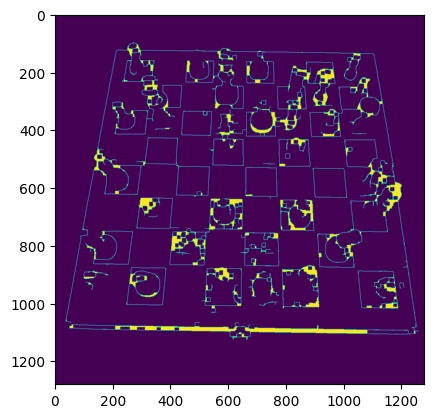

In [195]:
limit=20,
grid=(10,10)
iters=5

#edge_2 = cv.cvtColor(edge, cv.COLOR_BGR2GRAY)
for i in range(iters):
    edge_2 = cv.createCLAHE(clipLimit=2,tileGridSize=grid).apply(edge_d)
    if limit != 0:
        kernel = np.ones((10, 10), np.uint8)
        edge_2 = cv.morphologyEx(edge_2, cv.MORPH_CLOSE, kernel)
plt.imshow(edge_2)

### Contours

186


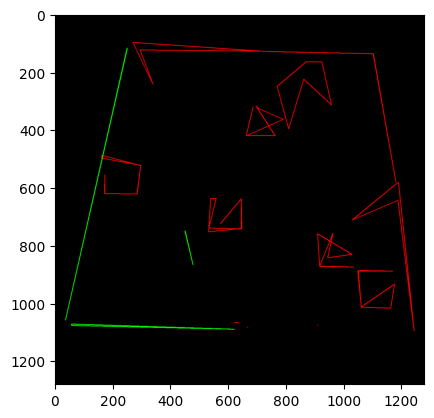

In [201]:
#img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_black = np.zeros((1280, 1280, 3), dtype = np.uint8)

#kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(4,4))
#dilated = cv.dilate(edge, kernel, iterations=2)

contours, hierarchy = cv.findContours(edge_d, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    # Approximate the contour shape to a polygon
    peri = cv.arcLength(contour, True)
    if peri > 1000:
        polygon = cv.approxPolyDP(contour, epsilon=0.05*cv.arcLength(contour, True), closed=False)
        sides = len(polygon)
        if sides == 3:
            pass
            cv.drawContours(img_black, [polygon], 0, (0, 255, 0), 2)
        elif sides == 4:
            cv.drawContours(img_black, [polygon], 0, (0, 0, 255), 2)
        else:
            cv.drawContours(img_black, [polygon], 0, (255, 0, 0), 2)
print(len(contours))
plt.imshow(img_black)